In [68]:
import pandas as pd
import os

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
file_path=os.path.join(os.getcwd(),"Transformed_data","EDA.csv")

df = pd.read_csv(file_path)

In [70]:
df.head()

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Cost,State
0,Low_Reputation,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,urban,-283.29,Ohio
1,Low_Reputation,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,urban,-159.96,Wyoming
2,Low_Reputation,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,remote,-154.29,Washington
3,Low_Reputation,9.0,8.0,649.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,remote,-161.16,Kentucky
4,Low_Reputation,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,urban,-159.23,Pennsylvania


In [71]:
df.head()

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Cost,State
0,Low_Reputation,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,urban,-283.29,Ohio
1,Low_Reputation,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,urban,-159.96,Wyoming
2,Low_Reputation,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,remote,-154.29,Washington
3,Low_Reputation,9.0,8.0,649.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,remote,-161.16,Kentucky
4,Low_Reputation,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,urban,-159.23,Pennsylvania


#### Train Test Split


In [72]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X is your feature matrix and y is your target variable
X = df.drop('Cost', axis=1)  # Features (excluding the target column)
y = np.log(df['Cost'].abs() + 1)  # Target variable



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Check the shapes of the resulting sets
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (4318, 15)
Training set - y shape: (4318,)
Testing set - X shape: (762, 15)
Testing set - y shape: (762,)


#### Data Distribution

In [73]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=X_train)

In [74]:
numerical_labels

['Height', 'Width', 'Weight', 'Price_Of_Sculpture', 'Base_Shipping_Price']

In [75]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

In [76]:
def print_categories_for_columns(data, categorical_columns):
    """
    Print the unique categories for the specified categorical columns in the given DataFrame.

    Parameters:
    - data: pandas DataFrame
        The input DataFrame containing categorical variables.
    - categorical_columns: list
        A list of column names with categorical variables.

    Returns:
    None
    """
    for column in categorical_columns:
        unique_categories = data[column].unique()
        print(f"{column} categories: {unique_categories}")
        
        
print_categories_for_columns(data=df, categorical_columns=categorical_labels)

Artist_Reputation categories: ['Low_Reputation' 'High_Reputation' 'Moderate_Reputation']
Material categories: ['Brass' 'Clay' 'Aluminium' 'Wood' 'Marble' 'Bronze' 'Stone']
International categories: ['Yes' 'No']
Express_Shipment categories: ['Yes' 'No']
Installation_Included categories: ['No' 'Yes']
Transport categories: ['Airways' 'Roadways' 'Waterways']
Fragile categories: ['No' 'Yes']
Customer_Information categories: ['Working Class' 'Wealthy']
Remote_Location categories: ['urban' 'remote']
State categories: ['Ohio' 'Wyoming' 'Washington' 'Kentucky' 'Pennsylvania' 'Alabama'
 'West Virginia' 'California' 'North Dakota' 'Georgia'
 'District of Columbia' 'Texas' nan 'Oregon' 'New Hampshire' 'Arkansas'
 'Vermont' 'Iowa' 'Colorado' 'South Carolina' 'Oklahoma' 'Hawaii'
 'Rhode Island' 'Louisiana' 'Delaware' 'Maryland' 'Idaho' 'Connecticut'
 'Florida' 'Virginia' 'Massachusetts' 'Kansas' 'Maine' 'North Carolina'
 'Nevada' 'South Dakota' 'Wisconsin' 'Minnesota' 'Montana' 'Mississippi'
 'Illin

In [77]:
y_train

4054    5.533231
4581    7.264604
5041    5.905362
443     6.896421
2689    9.504428
          ...   
4426    5.575570
466     5.602414
3092    5.809313
3772    5.184925
860     5.605103
Name: Cost, Length: 4318, dtype: float64

In [78]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

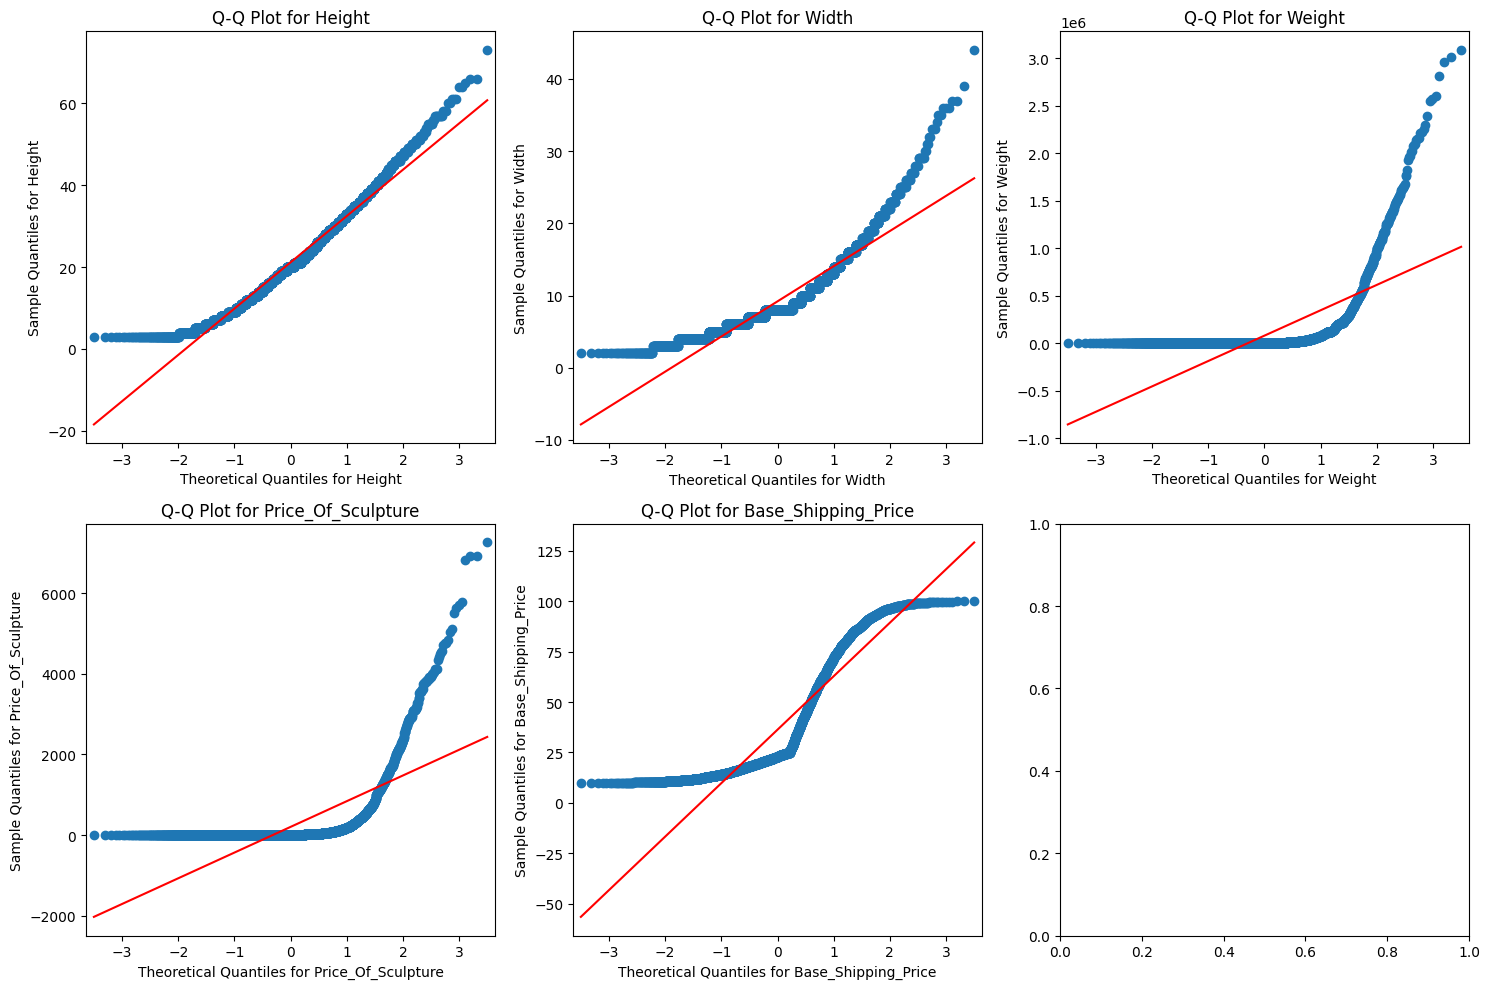

In [79]:
def plot_qq_plots(dataframe, column_labels, plots_per_row=3):
    # Check if the columns exist in the DataFrame
    for label in column_labels:
        if label not in dataframe.columns:
            raise ValueError(f"Column '{label}' not found in the DataFrame.")

    # Calculate the number of rows needed
    num_columns = len(column_labels)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row

    # Create Q-Q plots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

    for i, label in enumerate(column_labels):
        row_idx = i // plots_per_row
        col_idx = i % plots_per_row

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sm.qqplot(dataframe[label], line='s', ax=ax)
        ax.set_xlabel(f'Theoretical Quantiles for {label}')
        ax.set_ylabel(f'Sample Quantiles for {label}')
        ax.set_title(f'Q-Q Plot for {label}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

plot_qq_plots(dataframe=X_train, column_labels=numerical_labels)

In [80]:
df.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'Cost', 'State'],
      dtype='object')

In [81]:
import numpy as np

# Base 2 logarithm transform the specified numerical columns
X_train[numerical_labels] = np.log(X_train[numerical_labels] + 1)
X_test[numerical_labels] = np.log(X_test[numerical_labels] + 1)

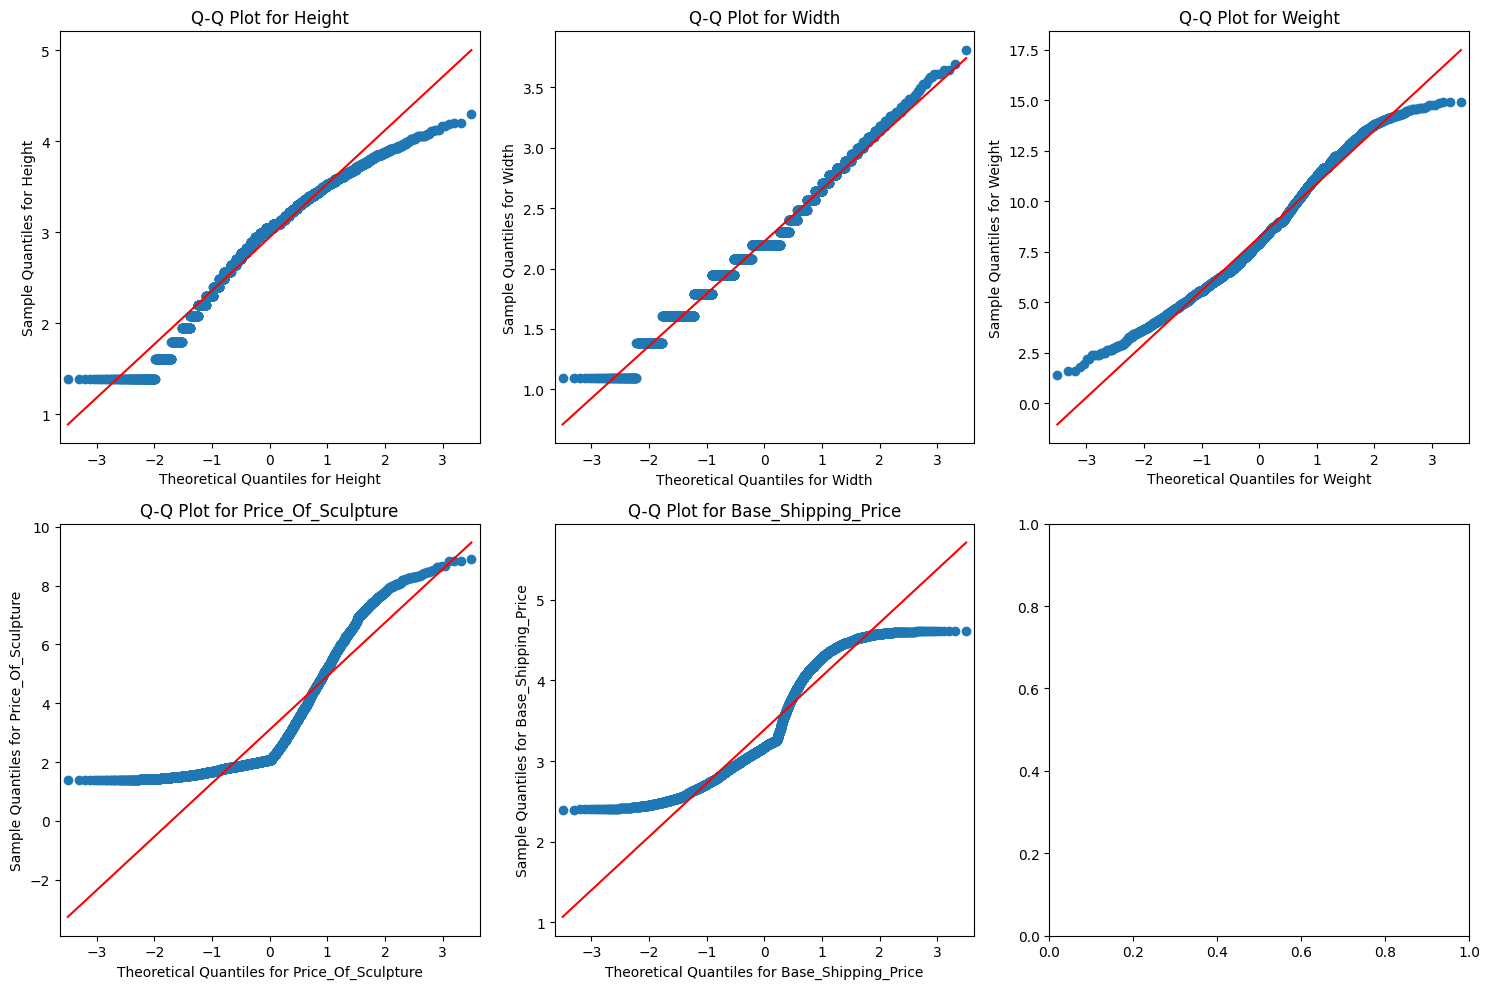

In [82]:
plot_qq_plots(dataframe=X_train, column_labels=numerical_labels)

In [83]:
X_train[categorical_labels]

,Artist_Reputation,Material,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,State
4054,High_Reputation,Clay,No,No,Yes,Roadways,Yes,Working Class,urban,Pennsylvania
4581,Moderate_Reputation,Bronze,No,No,Yes,Roadways,No,Working Class,urban,Utah
5041,High_Reputation,Brass,Yes,Yes,Yes,Airways,No,Working Class,urban,Oregon
443,Moderate_Reputation,Stone,No,No,No,Roadways,No,Wealthy,remote,Alabama
2689,Moderate_Reputation,Marble,No,No,Yes,Waterways,Yes,Wealthy,urban,Iowa
...,...,...,...,...,...,...,...,...,...,...
4426,Moderate_Reputation,Aluminium,No,Yes,Yes,Airways,No,Wealthy,urban,Hawaii
466,Low_Reputation,Bronze,No,Yes,No,Roadways,No,Wealthy,urban,Maryland
3092,Moderate_Reputation,Clay,No,No,Yes,Roadways,Yes,Wealthy,remote,Vermont
3772,Moderate_Reputation,Wood,No,Yes,No,Roadways,No,Wealthy,urban,Illinois


In [84]:
def print_unique_counts(dataframe, column_labels):
    for label in column_labels:
        unique_counts = dataframe[label].nunique()
        print(f"Unique count for column '{label}': {unique_counts}")


# Call the function with your DataFrame and column labels
print_unique_counts(dataframe=X_train, column_labels=categorical_labels)

Unique count for column 'Artist_Reputation': 3
Unique count for column 'Material': 7
Unique count for column 'International': 2
Unique count for column 'Express_Shipment': 2
Unique count for column 'Installation_Included': 2
Unique count for column 'Transport': 3
Unique count for column 'Fragile': 2
Unique count for column 'Customer_Information': 2
Unique count for column 'Remote_Location': 2
Unique count for column 'State': 51


In [85]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

In [86]:
X_train.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'State'],
      dtype='object')

In [87]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

In [88]:
X_train.shape

(4318, 15)

In [89]:
X_test.shape

(762, 15)

In [90]:
X_train

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,State
4054,High_Reputation,2.197225,1.609438,5.049856,Clay,1.572774,2.889816,No,No,Yes,Roadways,Yes,Working Class,urban,Pennsylvania
4581,Moderate_Reputation,3.258097,2.302585,9.194617,Bronze,3.813528,4.535927,No,No,Yes,Roadways,No,Working Class,urban,Utah
5041,High_Reputation,2.302585,1.609438,5.402677,Brass,1.607436,2.526528,Yes,Yes,Yes,Airways,No,Working Class,urban,Oregon
443,Moderate_Reputation,2.708050,2.079442,11.213724,Stone,5.038575,3.309813,No,No,No,Roadways,No,Wealthy,remote,Alabama
2689,Moderate_Reputation,3.806662,2.708050,14.585007,Marble,8.252662,4.135646,No,No,Yes,Waterways,Yes,Wealthy,urban,Iowa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,Moderate_Reputation,2.197225,1.609438,4.753590,Aluminium,1.408545,3.106826,No,Yes,Yes,Airways,No,Wealthy,urban,Hawaii
466,Low_Reputation,2.639057,1.945910,7.383989,Bronze,1.842136,2.695303,No,Yes,No,Roadways,No,Wealthy,urban,Maryland
3092,Moderate_Reputation,3.091042,2.564949,7.378384,Clay,1.678964,3.222469,No,No,Yes,Roadways,Yes,Wealthy,remote,Vermont
3772,Moderate_Reputation,1.791759,1.609438,3.891820,Wood,1.578979,2.860485,No,Yes,No,Roadways,No,Wealthy,urban,Illinois


In [91]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

In [92]:
X_train.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'State'],
      dtype='object')

In [93]:
import joblib

In [94]:
def one_hot_encode(X_train, X_test, categorical_columns, save_encoder_path="Preprocessor/one_hot_encoder.joblib"):
    # Use pd.get_dummies to one-hot encode the categorical columns with 1s and 0s
    X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True, dtype=int)
    X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True, dtype=int)

    # Save the one-hot encoder if the save_encoder_path is provided
    if save_encoder_path:
        # Save the list of columns after one-hot encoding
        encoded_columns = X_train_encoded.columns.tolist()
        with open(save_encoder_path, 'wb') as encoder_file:
            joblib.dump(encoded_columns, encoder_file)

    return X_train_encoded, X_test_encoded


X_train, X_test = one_hot_encode(X_train, X_test, categorical_columns=categorical_labels)


In [95]:
X_train.shape

(4318, 71)

In [96]:
X_test.shape

(762, 71)

In [97]:
import seaborn as sns

In [98]:
X_train

,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price,Artist_Reputation_Low_Reputation,Artist_Reputation_Moderate_Reputation,Material_Brass,Material_Bronze,Material_Clay,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
4054,2.197225,1.609438,5.049856,1.572774,2.889816,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4581,3.258097,2.302585,9.194617,3.813528,4.535927,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5041,2.302585,1.609438,5.402677,1.607436,2.526528,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
443,2.708050,2.079442,11.213724,5.038575,3.309813,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2689,3.806662,2.708050,14.585007,8.252662,4.135646,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2.197225,1.609438,4.753590,1.408545,3.106826,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,2.639057,1.945910,7.383989,1.842136,2.695303,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3092,3.091042,2.564949,7.378384,1.678964,3.222469,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3772,1.791759,1.609438,3.891820,1.578979,2.860485,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
import pandas as pd

class RegressionModels:
    def __init__(self):
        self.models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(),
            'Lasso Regression': Lasso(),
            'Gradient Boosting': GradientBoostingRegressor(),
            'AdaBoost': AdaBoostRegressor(),
            'Decision Tree': DecisionTreeRegressor(),
            'Random Forest': RandomForestRegressor(),
            'KNeighbors': KNeighborsRegressor(),
            'XGBoost': XGBRegressor()  # Add XGBoost to the models
        }
        self.trained_models = {}

    def train_models(self, X_train, y_train):
        for model_name, model in self.models.items():
            if 'Regression' in model_name:
                # For linear regression models, use standard scaling
                pipeline = make_pipeline(StandardScaler(), model)
            else:
                # For other models, no need for scaling
                pipeline = model
            pipeline.fit(X_train, y_train)
            self.trained_models[model_name] = pipeline

    def predict_models(self, X_test):
        predictions = {}
        for model_name, model in self.trained_models.items():
            predictions[model_name] = model.predict(X_test)
        return predictions

    def evaluate_models(self, y_true, predictions):
        evaluations = {}
        for model_name, y_pred in predictions.items():
            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            evaluations[model_name] = {'Mean Squared Error': mse, 'R2 Score': r2}
        return evaluations

# Assuming you have X_train, y_train, and X_test defined elsewhere
# Create an instance of the RegressionModels class
regression_models = RegressionModels()

# Train the models on the training data
regression_models.train_models(X_train, y_train)

# Predict using the trained models on the test data
predictions = regression_models.predict_models(X_test)

# Evaluate the models on the test data
evaluations = regression_models.evaluate_models(y_test, predictions)

# Create a list of dictionaries to store the data
data_list = []

# Populate the list with evaluation results
for model_name, metrics in evaluations.items():
    data_list.append({
        'Model Name': model_name,
        'Mean Squared Error': metrics['Mean Squared Error'],
        'R2 Score': metrics['R2 Score']
    })

# Create a DataFrame from the list
results_df = pd.DataFrame(data_list)

# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)

# Display the evaluations
for model_name, metrics in evaluations.items():
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R2 Score: {metrics['R2 Score']}")



Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.194498  0.866067
1   Ridge Regression            0.194494  0.866070
2   Lasso Regression            1.345744  0.073312
3  Gradient Boosting            0.137968  0.904994
4           AdaBoost            0.278616  0.808144
5      Decision Tree            0.211928  0.854065
6      Random Forest            0.127702  0.912063
7         KNeighbors            0.249141  0.828440
8            XGBoost            0.140759  0.903072

Linear Regression Evaluation:
Mean Squared Error: 0.19449840475292327
R2 Score: 0.8660671550566554

Ridge Regression Evaluation:
Mean Squared Error: 0.19449388343074744
R2 Score: 0.8660702684680106

Lasso Regression Evaluation:
Mean Squared Error: 1.3457439096284596
R2 Score: 0.07331214047394519

Gradient Boosting Evaluation:
Mean Squared Error: 0.1379679979935716
R2 Score: 0.904994354550669

AdaBoost Evaluation:
Mean Squared Error: 0.27861561298976145
R2 Score

In [100]:
# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)


Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.194498  0.866067
1   Ridge Regression            0.194494  0.866070
2   Lasso Regression            1.345744  0.073312
3  Gradient Boosting            0.137968  0.904994
4           AdaBoost            0.278616  0.808144
5      Decision Tree            0.211928  0.854065
6      Random Forest            0.127702  0.912063
7         KNeighbors            0.249141  0.828440
8            XGBoost            0.140759  0.903072


In [101]:
# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)

# Sort the DataFrame by a metric (e.g., Mean Squared Error or R2 Score)
results_df_sorted_mse = results_df.sort_values(by='Mean Squared Error', ascending=True)
results_df_sorted_r2 = results_df.sort_values(by='R2 Score', ascending=False)

# Display the top 3 models based on Mean Squared Error
top_3_mse = results_df_sorted_mse.head(3)
print("\nTop 3 models based on Mean Squared Error:")
print(top_3_mse)

# Display the top 3 models based on R2 Score
top_3_r2 = results_df_sorted_r2.head(3)
print("\nTop 3 models based on R2 Score:")
print(top_3_r2)


Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.194498  0.866067
1   Ridge Regression            0.194494  0.866070
2   Lasso Regression            1.345744  0.073312
3  Gradient Boosting            0.137968  0.904994
4           AdaBoost            0.278616  0.808144
5      Decision Tree            0.211928  0.854065
6      Random Forest            0.127702  0.912063
7         KNeighbors            0.249141  0.828440
8            XGBoost            0.140759  0.903072

Top 3 models based on Mean Squared Error:
          Model Name  Mean Squared Error  R2 Score
6      Random Forest            0.127702  0.912063
3  Gradient Boosting            0.137968  0.904994
8            XGBoost            0.140759  0.903072

Top 3 models based on R2 Score:
          Model Name  Mean Squared Error  R2 Score
6      Random Forest            0.127702  0.912063
3  Gradient Boosting            0.137968  0.904994
8            XGBoost            0

Feature Importances:
                                  Feature  Importance
3                      Price_Of_Sculpture    0.776254
5        Artist_Reputation_Low_Reputation    0.058906
4                     Base_Shipping_Price    0.051471
6   Artist_Reputation_Moderate_Reputation    0.031381
0                                  Height    0.019417
..                                    ...         ...
26                      State_Connecticut    0.000205
60                   State_South Carolina    0.000186
59                     State_Rhode Island    0.000170
58                     State_Pennsylvania    0.000148
23                         State_Arkansas    0.000144

[71 rows x 2 columns]


C:\Users\Hitesh\AppData\Local\Temp\ipykernel_3356\686551691.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")


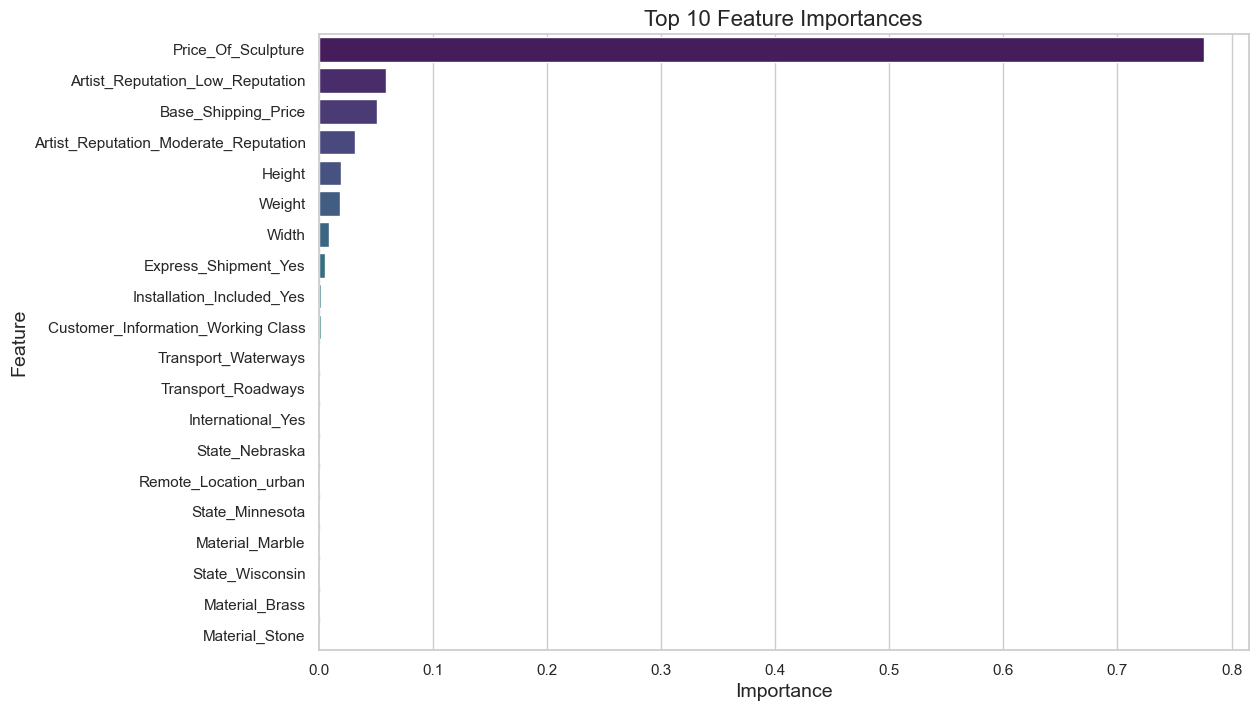

In [102]:

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)



try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set a seaborn style
    sns.set(style="whitegrid")

    # Plot the top 10 feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")
    
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title('Top 10 Feature Importances', fontsize=16)
    plt.show()
except ImportError:
    print("Matplotlib or Seaborn not installed. Visualization not available.")

In [103]:
import optuna
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

class OptunaRegression:
    def __init__(self, X_train, y_train, X_validation, y_validation):
        self.X_train = X_train
        self.y_train = y_train
        self.X_validation = X_validation
        self.y_validation = y_validation
        self.study_xgboost = optuna.create_study(direction='maximize')  # Change to 'maximize' for R2 score
        self.study_random_forest = optuna.create_study(direction='maximize')  # Change to 'maximize' for R2 score
        self.study_lightgbm = optuna.create_study(direction='maximize')  # Change to 'maximize' for R2 score
        self.best_models_xgboost = []
        self.best_models_random_forest = []
        self.best_models_lightgbm = []
        self.results_df = None

    def objective_xgboost(self, trial):
        xgboost_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 50),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            # Add other XGBoost hyperparameters as needed for optimization
        }

        xgboost_model = XGBRegressor(**xgboost_params)
        xgboost_model.fit(self.X_train, self.y_train)
        predictions = xgboost_model.predict(self.X_validation)
        r2 = r2_score(self.y_validation, predictions)

        return r2

    def objective_random_forest(self, trial):
        random_forest_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            # Add other Random Forest hyperparameters as needed for optimization
        }

        rf_model = RandomForestRegressor(**random_forest_params)
        rf_model.fit(self.X_train, self.y_train)
        predictions = rf_model.predict(self.X_validation)
        r2 = r2_score(self.y_validation, predictions)

        return r2

    def objective_lightgbm(self, trial):
        lightgbm_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            # Add other LightGBM hyperparameters as needed for optimization
        }

        lightgbm_model = lgb.LGBMRegressor(**lightgbm_params)
        lightgbm_model.fit(self.X_train, self.y_train)
        predictions = lightgbm_model.predict(self.X_validation)
        r2 = r2_score(self.y_validation, predictions)

        return r2

    def run_optimization(self, n_trials=50):
        self.study_xgboost.optimize(self.objective_xgboost, n_trials=n_trials, n_jobs=-1)
        self.study_random_forest.optimize(self.objective_random_forest, n_trials=n_trials, n_jobs=-1)
        self.study_lightgbm.optimize(self.objective_lightgbm, n_trials=n_trials, n_jobs=-1)

        # Get the best hyperparameters and models for XGBoost
        for i in range(3):
            trial = self.study_xgboost.trials[i]
            xgboost_params = {key: trial.params[key] for key in trial.params}
            best_model = XGBRegressor(**xgboost_params)
            best_model.fit(self.X_train, self.y_train)
            self.best_models_xgboost.append((xgboost_params, best_model))

        # Get the best hyperparameters and models for Random Forest
        for i in range(3):
            trial = self.study_random_forest.trials[i]
            random_forest_params = {key: trial.params[key] for key in trial.params}
            best_model = RandomForestRegressor(**random_forest_params)
            best_model.fit(self.X_train, self.y_train)
            self.best_models_random_forest.append((random_forest_params, best_model))

        # Get the best hyperparameters and models for LightGBM
        for i in range(3):
            trial = self.study_lightgbm.trials[i]
            lightgbm_params = {key: trial.params[key] for key in trial.params}
            best_model = lgb.LGBMRegressor(**lightgbm_params)
            best_model.fit(self.X_train, self.y_train)
            self.best_models_lightgbm.append((lightgbm_params, best_model))

        # Create a DataFrame to store the results
        self.results_df = pd.DataFrame({
            'Model': ['XGBoost', 'Random Forest', 'LightGBM'],
            'Best_Parameters': [
                str(self.study_xgboost.best_params),
                str(self.study_random_forest.best_params),
                str(self.study_lightgbm.best_params)
            ],
            'Final_Optimized_Score': [
                self.study_xgboost.best_value,
                self.study_random_forest.best_value,
                self.study_lightgbm.best_value
            ]
        })

        return self.results_df

# Assuming X_train, X_test, y_train, y_test are available
optuna_regression = OptunaRegression(X_train, y_train, X_test, y_test)
results_df = optuna_regression.run_optimization(n_trials=50)

# Print the results DataFrame
print("Results DataFrame:")
print(results_df)


c:\Users\Hitesh\Documents\Projects\ML_PRoject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-11-22 19:30:04,663] A new study created in memory with name: no-name-e66660e0-16d3-4d66-9d29-6b334c83335f
[I 2023-11-22 19:30:04,663] A new study created in memory with name: no-name-c8f71a44-6a07-4a93-8122-eb86721d4522
[I 2023-11-22 19:30:04,663] A new study created in memory with name: no-name-757fa50f-6440-4675-8eb8-1f7861b6567c
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_3356\4108722710.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\Hitesh\AppData\Local\Temp\ip

In [ ]:
results_df

,Model,Best_Parameters,Final_Optimized_Score
0,XGBoost,"{'n_estimators': 191, 'learning_rate': 0.08993...",0.919859
1,Random Forest,"{'n_estimators': 112, 'max_depth': 10, 'min_sa...",0.910259
2,LightGBM,"{'n_estimators': 142, 'learning_rate': 0.07390...",0.920828


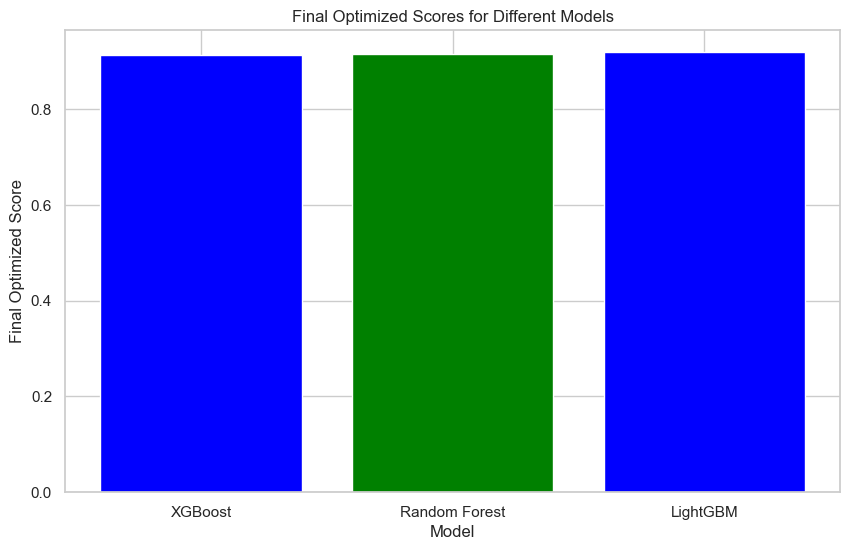

In [ ]:
def plot_model_scores(results_df):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df['Final_Optimized_Score'], color=['blue', 'green'])
    plt.title('Final Optimized Scores for Different Models')
    plt.xlabel('Model')
    plt.ylabel('Final Optimized Score')
    plt.show()

# Assuming results_df is the DataFrame containing the optimization results
plot_model_scores(results_df)

In [ ]:
# Use the best XGBoost model for predictions
best_xgboost_model = optuna_regression.best_models_xgboost[0][1]
xgboost_predictions = best_xgboost_model.predict(X_test)

# Use the best Random Forest model for predictions
best_rf_model = optuna_regression.best_models_random_forest[0][1]
rf_predictions = best_rf_model.predict(X_test)

light_gbm_model=optuna_regression.best_models_lightgbm[0][1]
gbm_prediction=light_gbm_model.predict(X_test)

# Assuming you have the true y_test values for comparison
y_true = y_test

# Assuming you have log-transformed predictions
log_transformed_predictions_xgboost = best_xgboost_model.predict(X_test)  # Replace with your actual predictions
log_transformed_predictions_rf = best_rf_model.predict(X_test)  # Replace with your actual predictions
log_transformed_predictions_gbm = light_gbm_model.predict(X_test)


# Inverse log transformation to get back the original scale
original_predictions_xgboost = np.exp(log_transformed_predictions_xgboost)
original_predictions_rf = np.exp(log_transformed_predictions_rf)
original_predictions_gbm = np.exp(log_transformed_predictions_gbm)
# Compare predictions with true values
results_comparison = pd.DataFrame({
    'True_Values': y_true,
    'XGBoost_Predictions': original_predictions_xgboost,
    'RandomForest_Predictions': original_predictions_rf,
    'light_Gbm':original_predictions_gbm
})

# Print or use the comparison DataFrame as needed
print("Re-transformed Predictions Comparison:")
print(results_comparison)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Re-transformed Predictions Comparison:
      True_Values  XGBoost_Predictions  RandomForest_Predictions    light_Gbm
838      6.865495           671.313293                735.428609   668.074769
977      4.677491           238.528015                234.012985   351.124418
3989     7.086847          1349.382324               1341.916688   988.800791
798      7.829789          2721.758057               2232.774964  1198.110244
2174     7.985426          2685.829346               3215.751743  1649.676122
...           ...                  ...                       ...          ...
3767     6.475756          1021.319031               1079.808865   912.440783
2275     5.200925           220.182297                215.717894   327.108941

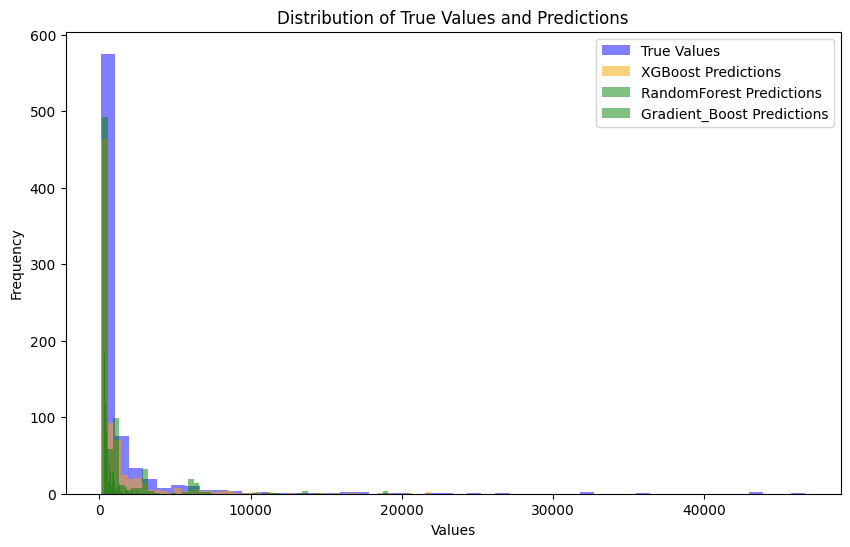

In [ ]:
plt.figure(figsize=(10, 6))

# Histogram for True Values
plt.hist(np.exp(y_test), bins=50, alpha=0.5, label='True Values', color='blue')

# Histogram for XGBoost Predictions
plt.hist(results_comparison['XGBoost_Predictions'], bins=50, alpha=0.5, label='XGBoost Predictions', color='orange')

# Histogram for RandomForest Predictions
plt.hist(results_comparison['RandomForest_Predictions'], bins=50, alpha=0.5, label='RandomForest Predictions', color='green')

plt.hist(results_comparison['light_Gbm'], bins=50, alpha=0.5, label='Gradient_Boost Predictions', color='green')


plt.title('Distribution of True Values and Predictions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
y_test

838     6.865495
977     4.677491
3989    7.086847
798     7.829789
2174    7.985426
          ...   
3767    6.475756
2275    5.200925
1550    4.902382
3210    5.165757
1553    5.223055
Name: Cost, Length: 771, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

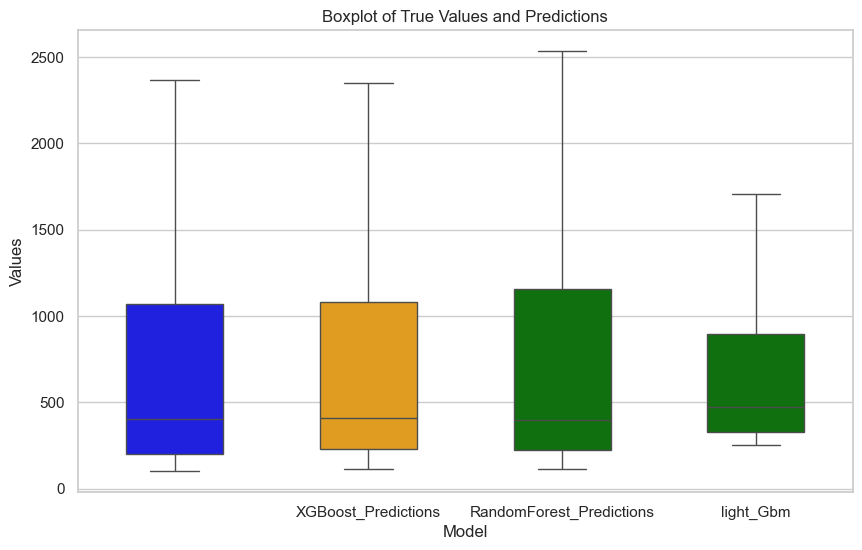

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have results_comparison DataFrame
plt.figure(figsize=(10, 6))

# Boxplot for True Values
sns.boxplot(data=np.exp(y_test), color='blue', width=0.5, showfliers=False)

# Boxplot for XGBoost Predictions
sns.boxplot(data=results_comparison[['XGBoost_Predictions']], color='orange', width=0.5, showfliers=False)

# Boxplot for RandomForest Predictions
sns.boxplot(data=results_comparison[['RandomForest_Predictions']], color='green', width=0.5, showfliers=False)


sns.boxplot(data=results_comparison[['light_Gbm']], color='green', width=0.5, showfliers=False)

plt.title('Boxplot of True Values and Predictions')
plt.xlabel('Model')
plt.ylabel('Values')
plt.show


In [ ]:
import os
import pickle
import yaml
import joblib  # Use joblib for pickling models

def save_model(model, model_params, r2_score, folder_name, model_name):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Save the model object using joblib
    model_filename = os.path.join(folder_name, f'{model_name}_model.joblib')
    joblib.dump(model, model_filename)

    # Save the model parameters and R2 score to a YAML file
    yaml_data = {
        'Model': model_name,
        'Model_Parameters': model_params,
        'R2_Score': r2_score
    }

    yaml_filename = os.path.join(folder_name, f'{model_name}_params.yaml')
    with open(yaml_filename, 'w') as yaml_file:
        yaml.dump(yaml_data, yaml_file)

    print(f"Model and parameters saved to {model_filename} and {yaml_filename}")

# Example usage
# Assuming you have a model object named 'your_model', its parameters 'your_model_params',
# R2 score 'your_r2_score', and a folder named 'your_folder_name'
save_model(model=best_xgboost_model, 
           model_params= results_df['Best_Parameters'].iloc[0], 
           r2_score=str(results_df['Final_Optimized_Score'].iloc[0]),
           folder_name=os.path.join("Models",results_df['Model'].iloc[0]),
           model_name=results_df['Model'].iloc[0])


save_model(model=best_rf_model, 
           model_params= results_df['Best_Parameters'].iloc[1], 
           r2_score=str(results_df['Final_Optimized_Score'].iloc[1]),
           folder_name=os.path.join("Models",results_df['Model'].iloc[1]),
           model_name=results_df['Model'].iloc[1])

save_model(model=light_gbm_model, 
           model_params= results_df['Best_Parameters'].iloc[2], 
           r2_score=str(results_df['Final_Optimized_Score'].iloc[2]),
           folder_name=os.path.join("Models",results_df['Model'].iloc[2]),
           model_name=results_df['Model'].iloc[2])

Model and parameters saved to Models\XGBoost\XGBoost_model.joblib and Models\XGBoost\XGBoost_params.yaml
Model and parameters saved to Models\Random Forest\Random Forest_model.joblib and Models\Random Forest\Random Forest_params.yaml
Model and parameters saved to Models\LightGBM\LightGBM_model.joblib and Models\LightGBM\LightGBM_params.yaml


In [ ]:
results_df

,Model,Best_Parameters,Final_Optimized_Score
0,XGBoost,"{'n_estimators': 191, 'learning_rate': 0.08993...",0.919859
1,Random Forest,"{'n_estimators': 112, 'max_depth': 10, 'min_sa...",0.910259
2,LightGBM,"{'n_estimators': 142, 'learning_rate': 0.07390...",0.920828


In [ ]:
def ensemble_regression(models, X_train, y_train, X_test):
    """
    Ensemble three regression models (XGBoost, LightGBM, Random Forest) using averaging.

    Parameters:
    - models: List of regression models (XGBoost, LightGBM, RandomForest)
    - X_train: Training features
    - y_train: Training labels
    - X_test: Testing features

    Returns:
    - final_predictions: Averaged predictions on the test set
    """

    # Split the data for meta-model training
    X_train_base, X_meta, y_train_base, y_meta = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train base regression models
    predictions_base = []
    for model in models:
        model.fit(X_train_base, y_train_base)
        pred_base = model.predict(X_meta)
        predictions_base.append(pred_base)

    # Average predictions from base models
    avg_predictions = np.mean(predictions_base, axis=0)

    # Evaluate the performance on the validation set
    mse = mean_squared_error(y_meta, avg_predictions)
    print(f'Mean Squared Error on Validation Set: {mse}')

    # Make predictions on the test set
    final_predictions = np.mean([model.predict(X_test) for model in models], axis=0)

    return np.exp(final_predictions)

# Example usage:
# Assuming X_train, y_train, X_test are your training features, training labels, and testing features.
xgb_model = best_xgboost_model
lgbm_model = light_gbm_model
rf_model = best_rf_model

models = [xgb_model, lgbm_model, rf_model]

final_predictions = ensemble_regression(models, X_train, y_train, X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 3495, number of used features: 26
[LightGBM] [Info] Start training from score 6.340685
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Squared Error on Validation Set: 0.20230565536538742
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
ensemble_df=pd.DataFrame()
ensemble_df["Test_Data"]=np.exp(y_test)
ensemble_df["Averaged_Predictions"]=final_predictions

ensemble_df

,Test_Data,Averaged_Predictions
838,958.62,827.987014
977,107.50,199.511453
3989,1196.13,1108.490455
798,2514.40,1140.875329
2174,2937.83,3551.720906
...,...,...
3767,649.21,1019.985651
2275,181.44,270.138266
1550,134.61,254.500281
3210,175.17,288.209272


C:\Users\Hitesh\AppData\Local\Temp\ipykernel_7512\3261573494.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Values', data=melted_df, palette={"True Values": "blue", "Averaged Predictions": "green"}, showfliers=False)


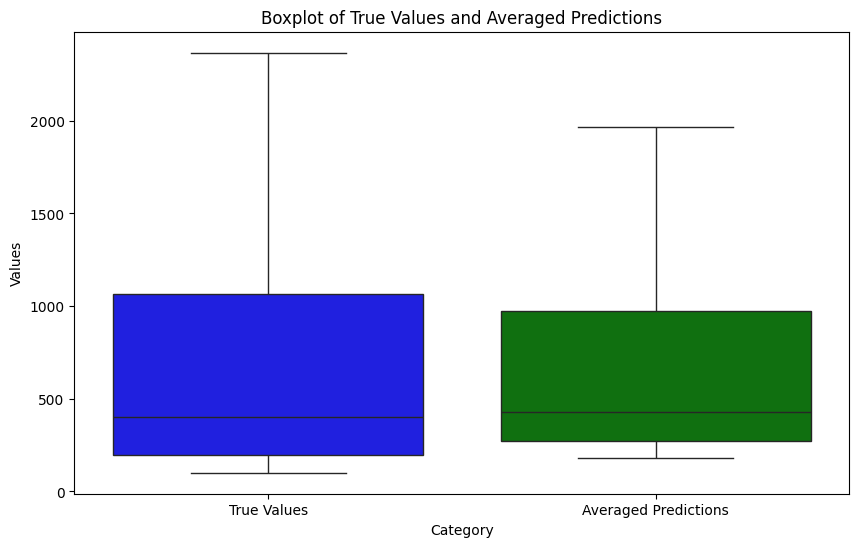

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have results_comparison DataFrame
plt.figure(figsize=(10, 6))

# Combine "Test_Data" and "Averaged_Predictions" into a single DataFrame for plotting
combined_df = pd.concat([ensemble_df["Test_Data"].rename("True Values"),
                        ensemble_df["Averaged_Predictions"].rename("Averaged Predictions")],
                       axis=1)

# Melt the DataFrame to have a 'variable' column for hue
melted_df = pd.melt(combined_df, var_name='Category', value_name='Values')

# Create a boxplot with hue to distinguish between true values and predictions
sns.boxplot(x='Category', y='Values', data=melted_df, palette={"True Values": "blue", "Averaged Predictions": "green"}, showfliers=False)

plt.title('Boxplot of True Values and Averaged Predictions')
plt.ylabel('Values')

# Show the plot
plt.show()
